<a href="https://colab.research.google.com/github/Heilley/Grocery_Sales_Prediction/blob/main/Grocery_Sales_Prediction_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT 1, PART 2, Halima Bulama-Ladan, 05/02/2022**

**Grocery store sales prediction**




**Checking and eradication of irrelevant column, by assigning Item_Identifier as index column.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename=pd.read_csv("/content/sales_predictions.csv", index_col =0)
df = filename
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


**Dispay of basic data information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


In [ ]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

**Checking for duplicate enteries.**

In [ ]:
df.duplicated().sum()

0

**Checking for null values**

In [ ]:
df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
null_values =df.isna().sum()
null_values[null_values>0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

**Graphical display of dataframe revealing two columns, Item_Weight and Outlet_Size to contain missing values**

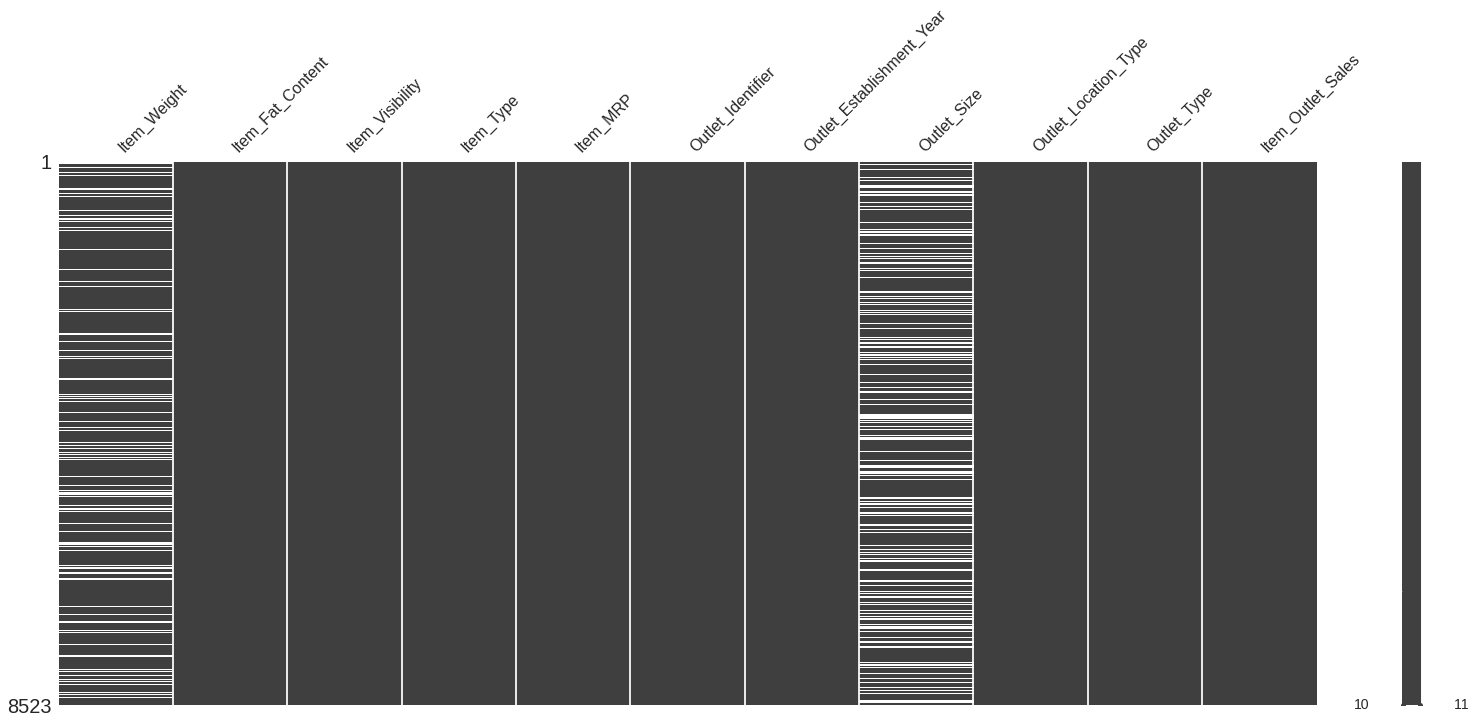

In [ ]:
import missingno as miss
miss.matrix(df)


**The missing values are located all over the two columns. In my opinion, the columns outlet_size and item_weight might be of relevance to the prediction of sales, so rather than dropping the columns, it is wiser to fill the null values with thier median occuring value.**

In [ ]:
Item_weight_rep = round(df["Item_Weight"].median())
Item_weight_rep

13

In [ ]:
df['Item_Weight'] = df['Item_Weight'].fillna(value = Item_weight_rep)
df['Item_Weight'].isna().sum()

0

In [ ]:
df['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [ ]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = "Medium")
df['Outlet_Size'].isna().sum()

0

A graphical display of dataframe that there are no more missing values.





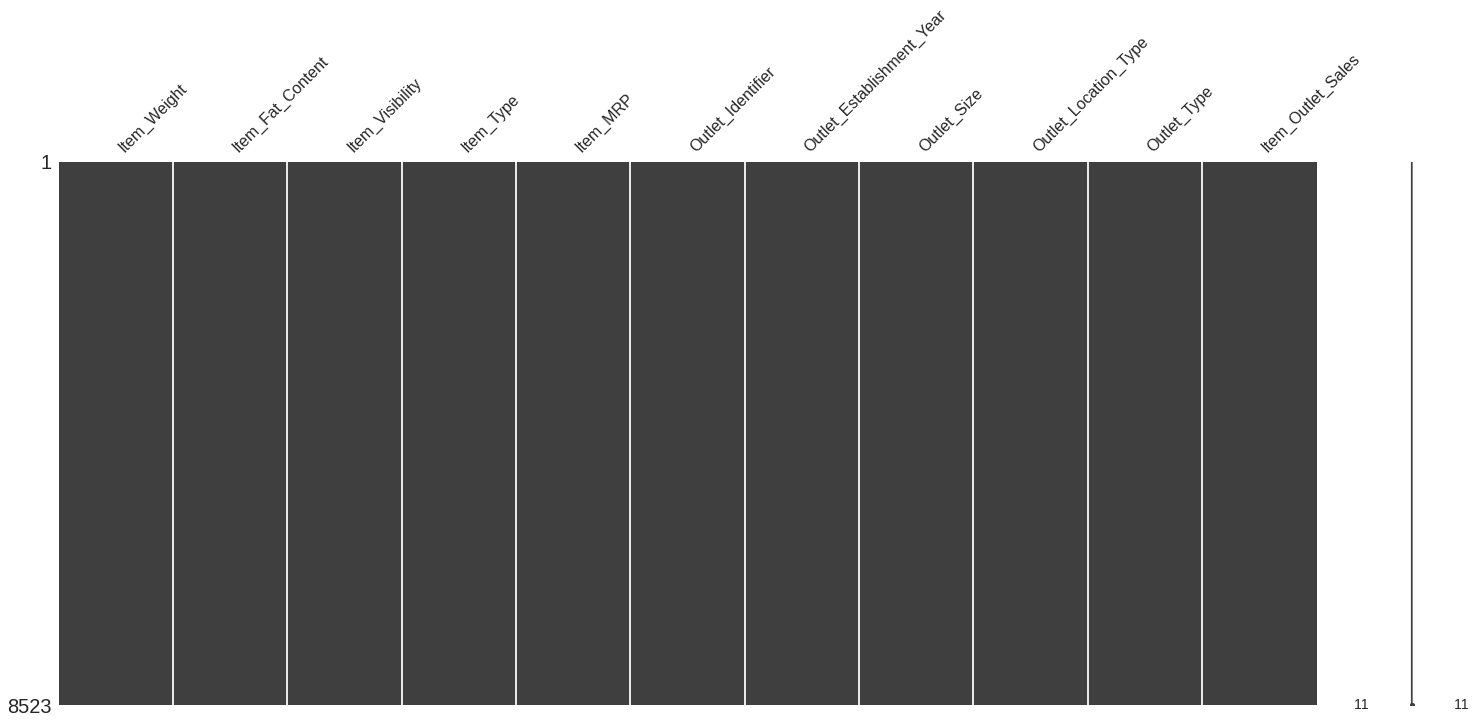

In [ ]:
miss.matrix(df)

In [ ]:
df.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Checking and fixing of consistency in categories of data (columns with object datatypes).**

In [ ]:
df['Item_Fat_Content']  = df['Item_Fat_Content'].str.capitalize()
df['Item_Fat_Content'].unique()

array(['Low fat', 'Regular', 'Lf', 'Reg'], dtype=object)

In [ ]:
df['Item_Fat_Content'] .replace ({'Lf':'Low Fat','Low Fat':'Low fat', 'Reg': 'Regular'},inplace = True)
df['Item_Fat_Content'].unique()

array(['Low fat', 'Regular'], dtype=object)

In [ ]:
df['Item_Fat_Content'].value_counts()

Low fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
df["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
df.duplicated().any()

False

**Summary Statistics of numerical columns.**

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.882081,0.066132,140.992782,1997.831867,2181.288914
std,4.226465,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,13.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**A bar chart representation of the distribution of the types fat content in products.**
**We can see here that items containing fat content, are most likely to contain the low fat type in the composition than the regular type of fat**.

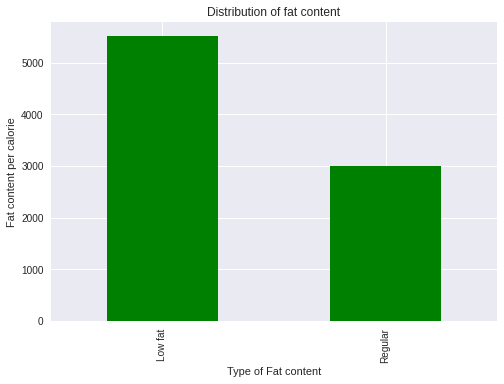

In [ ]:
df['Item_Fat_Content'].value_counts().plot(kind = 'bar', color ="green")
plt.title('Distribution of fat content')
plt.ylabel("Fat content per calorie")
plt.xlabel("Type of Fat content")
plt.show()

**A bar representation of the various items being sold and the amount being sold.**
**Fruits and vegetables are being sold more than any item in all selling outlets, while breakfast and seafood are the least bought items.**

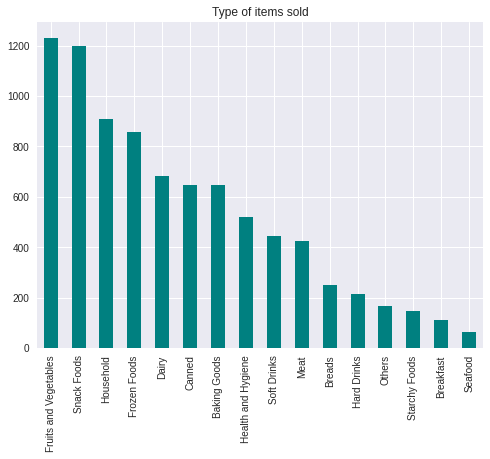

In [ ]:
plt.figure(figsize=(8,6))
df['Item_Type'].value_counts().plot(kind = 'bar', color ="Teal")
plt.title('Type of items sold')
plt.show()

**A pie chart representation of sales across the three different sizes of sales outlets. Medium sized outlets have the highest number of sales, followed by the small outlets, high sized outlets make the least of sales**

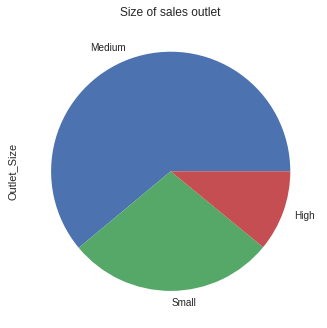

In [ ]:
df['Outlet_Size'].value_counts().plot(kind = 'pie')
plt.title('Size of sales outlet')
plt.show()

**A histogram representation of amount of sales across the different types of sales outlets. We can see here that the type1 supermakets make the highest number of sales as compared to other types.**

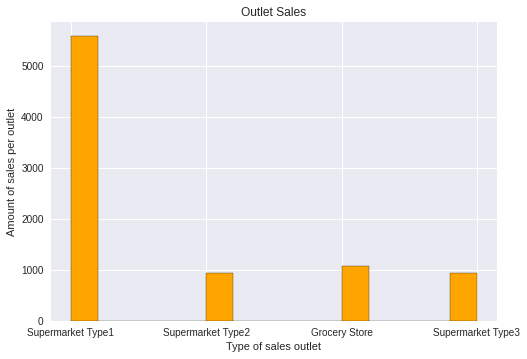

In [ ]:
df["Outlet_Type"].hist(bins =15,color ='orange', edgecolor = 'black')
plt.style.use('seaborn')
plt.title("Outlet Sales")
plt.ylabel("Amount of sales per outlet")
plt.xlabel("Type of sales outlet")
plt.show()


In [ ]:
df.boxplot(column = 'Income', grid = False)
plt.title('Distribution of Income')
plt.show()

**A boxplot representation of sales based on the year of outlet establishment. It can be seen here that majority of the outlets were established between the year 1985 and 1999, with a few more established between 1999 up to 2004**

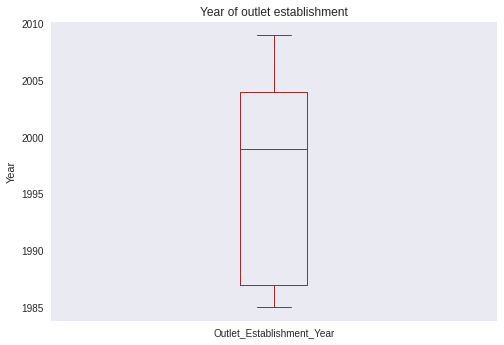

In [ ]:
df.boxplot(column= "Outlet_Establishment_Year", grid = False, color = 'brown')
plt.title("Year of outlet establishment")
plt.ylabel('Year')
plt.show;

**A heatmap representation of the correlation coefficients between the features of the dataframe. The items in this dataframe have no correlation with each except for Item_MRP and Item_Outlet_Sales, these two have a low correlation relationship.**

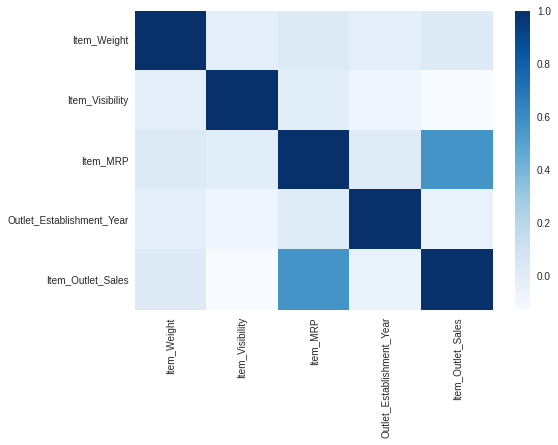

In [ ]:
import seaborn as sns
sns.heatmap(corr, cmap = 'Blues');
